In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
level_3 = pd.read_csv('../data/2022/level_3.csv')
level_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165024 entries, 0 to 165023
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 165024 non-null  int64 
 1   UKPRN                      165024 non-null  int64 
 2   Provider                   165024 non-null  object
 3   Subject Code               165024 non-null  object
 4   Subject                    165024 non-null  object
 5   Level                      165024 non-null  object
 6   Question Number            165024 non-null  object
 7   Answered 1                 165024 non-null  object
 8   Answered 2                 165024 non-null  object
 9   Answered 3                 165024 non-null  object
 10  Answered 4                 165024 non-null  object
 11  Answered 5                 165024 non-null  object
 12  N/A                        165024 non-null  int64 
 13  Confidence interval - min  165024 non-null  

In [38]:
level_3[level_3['Sample Size'] < 50].head()

,Unnamed: 0,UKPRN,Provider,Subject Code,Subject,Level,Question Number,Answered 1,Answered 2,Answered 3,Answered 4,Answered 5,N/A,Confidence interval - min,Actual value,Confidence interval - max,Response,Sample Size
27,35,10007783,University of Aberdeen,CAH01-01-04,Dentistry,First degree,Q01,5%,5%,10%,70%,10%,0,56%,80,93%,20,22
28,36,10007783,University of Aberdeen,CAH01-01-04,Dentistry,First degree,Q02,10%,5%,10%,65%,10%,0,51%,75,90%,20,22
29,37,10007783,University of Aberdeen,CAH01-01-04,Dentistry,First degree,Q03,5%,0%,0%,42%,53%,1,73%,95,99%,19,22
30,38,10007783,University of Aberdeen,CAH01-01-04,Dentistry,First degree,Q04,10%,15%,15%,40%,20%,0,37%,60,80%,20,22
31,40,10007783,University of Aberdeen,CAH01-01-04,Dentistry,First degree,Q05,5%,10%,25%,30%,30%,0,37%,60,80%,20,22


In [39]:
level_3.sort_values(by='Sample Size')['Sample Size'].describe()

count    165024.000000
mean         84.737402
std         128.960855
min          10.000000
25%          25.000000
50%          49.000000
75%         100.000000
max        4904.000000
Name: Sample Size, dtype: float64

In [40]:
# level_3_reduced = level_3[((level_3['Sample Size'] >= 25) & (level_3['Sample Size'] <= 100))]
level_3_reduced = level_3.copy()
level_3_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165024 entries, 0 to 165023
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 165024 non-null  int64 
 1   UKPRN                      165024 non-null  int64 
 2   Provider                   165024 non-null  object
 3   Subject Code               165024 non-null  object
 4   Subject                    165024 non-null  object
 5   Level                      165024 non-null  object
 6   Question Number            165024 non-null  object
 7   Answered 1                 165024 non-null  object
 8   Answered 2                 165024 non-null  object
 9   Answered 3                 165024 non-null  object
 10  Answered 4                 165024 non-null  object
 11  Answered 5                 165024 non-null  object
 12  N/A                        165024 non-null  int64 
 13  Confidence interval - min  165024 non-null  

In [41]:
len(level_3_reduced['Subject'].unique())

161

In [42]:
first_26 = list(level_3['Actual value'][:26])
actual_27 = level_3['Actual value'][27]

In [43]:
np.mean(first_26)

82.23076923076923

In [44]:
actual_27

80

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [48]:
level_3_reduced.describe()

,Unnamed: 0,UKPRN,N/A,Actual value,Response,Sample Size
count,165024.000000,1.650240e+05,165024.000000,165024.000000,165024.000000,165024.000000
mean,106959.055556,1.005160e+07,0.456085,73.889374,58.495649,84.737402
std,61753.571933,1.993303e+06,2.310798,15.943399,78.937530,128.960855
min,0.000000,1.000006e+07,0.000000,0.000000,4.000000,10.000000
25%,53479.750000,1.000534e+07,0.000000,65.000000,19.000000,25.000000
50%,106959.500000,1.000716e+07,0.000000,76.000000,35.000000,49.000000
75%,160439.250000,1.000780e+07,0.000000,86.000000,71.000000,100.000000
max,213919.000000,1.000000e+08,384.000000,100.000000,2636.000000,4904.000000


In [49]:
sample = level_3_reduced[['Actual value']]
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165024 entries, 0 to 165023
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Actual value  165024 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [50]:
reshaped_data = sample.values.reshape((6112, 27))
reshaped_data

array([[ 93,  92,  94, ...,  65,  50,  92],
       [ 80,  75,  95, ...,  35,  19,  45],
       [ 94, 100,  91, ...,  59,  63,  97],
       ...,
       [ 81,  60,  86, ...,  38,  50,  81],
       [ 69,  78,  91, ...,  31,  34,  65],
       [ 87,  86,  94, ...,  60,  55,  81]], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

X = reshaped_data[:, :26]
y = reshaped_data[:, 26]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=26, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/100


c:\user_exe\00_Leeds\Dissertation\project-files\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1771.0670 - val_loss: 47.3985
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.9965 - val_loss: 41.8698
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.2256 - val_loss: 46.8918
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.8946 - val_loss: 39.2102
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.0002 - val_loss: 38.3457
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.8639 - val_loss: 38.0323
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.2030 - val_loss: 38.6455
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.4431 - val_loss: 40.6625
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.9211 - val_loss: 41.7121
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.5462 - val_loss: 38.9472
Epoch 11/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.5068 - val_loss: 40.3823
Epoch 12/100
153/153 ━━━━━━━━

In [52]:
X_test[0]

array([ 41,  38,  59,  42,  51,  70,  70,  30,  41,   0,  32,  43,  41,
        41,  41,  81,  62,  58, 100,  49,  45,  89,  70,  32,  43,  38],
      dtype=int64)

In [53]:
y_test[0]

41

In [54]:
sample_input = X_test[6].reshape(1, -1)
predicted_output = model.predict(sample_input)
print("Sample Input:", X_test[6])
print("Input Shape:", X_test[6].shape)
print("Predicted Output:", predicted_output[0][0])
print("Actual Output:", y_test[6])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Sample Input: [ 92 100 100 100 100 100  92  92  92  92 100 100  75  92  92 100  92  67
  67  92  92  92  83  92  91  55]
Input Shape: (26,)
Predicted Output: 94.997185
Actual Output: 100


In [ ]:
predictions = model.predict(X_test)
predictions_train = model.predict(X_train)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Mean Absolute Error (MAE): 4.4605449748736605
Mean Squared Error (MSE): 33.95405516550955
R² Score: 0.8402482271194458


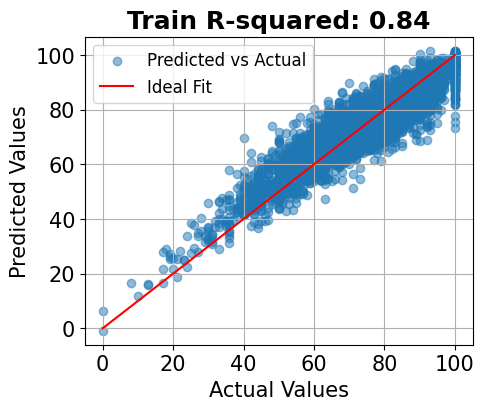

Mean Absolute Error (MAE): 4.68410402580255
Mean Squared Error (MSE): 40.30588204640779
R² Score: 0.7864518165588379


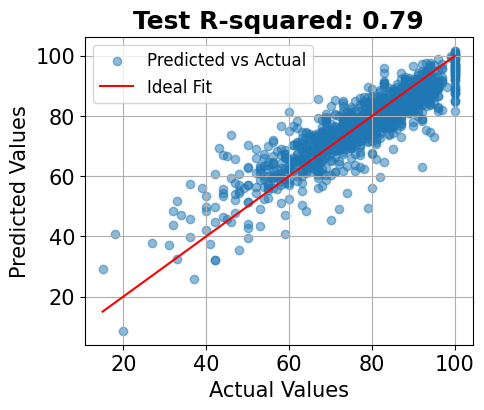

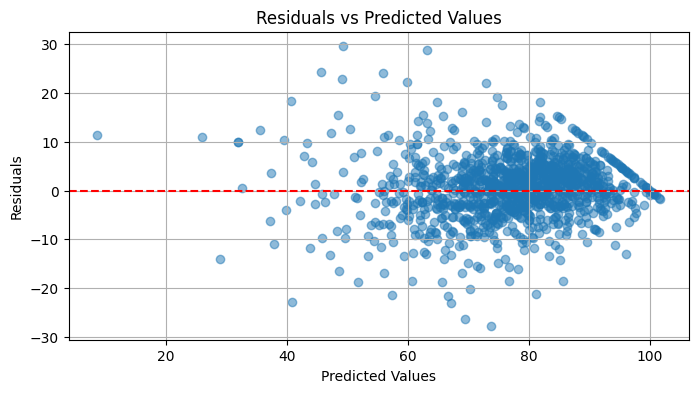

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2 = r2_score(y_train, predictions_train)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R² Score: {r2}")

# fig, (ax1, ax2) = plt.subplots(1, 2)


# Plot actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values',fontsize=15)
plt.ylabel('Predicted Values',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Train R-squared: {}'.format(round(r2, 2)), fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values',fontsize=15)
plt.ylabel('Predicted Values',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Test R-squared: {}'.format(round(r2, 2)), fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - predictions.flatten()
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

In [57]:
predictions = model.predict(X_test)
predictions_train = model.predict(X_train)

r2 = r2_score(y_test, predictions)
r2_train = r2_score(y_train, predictions_train)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


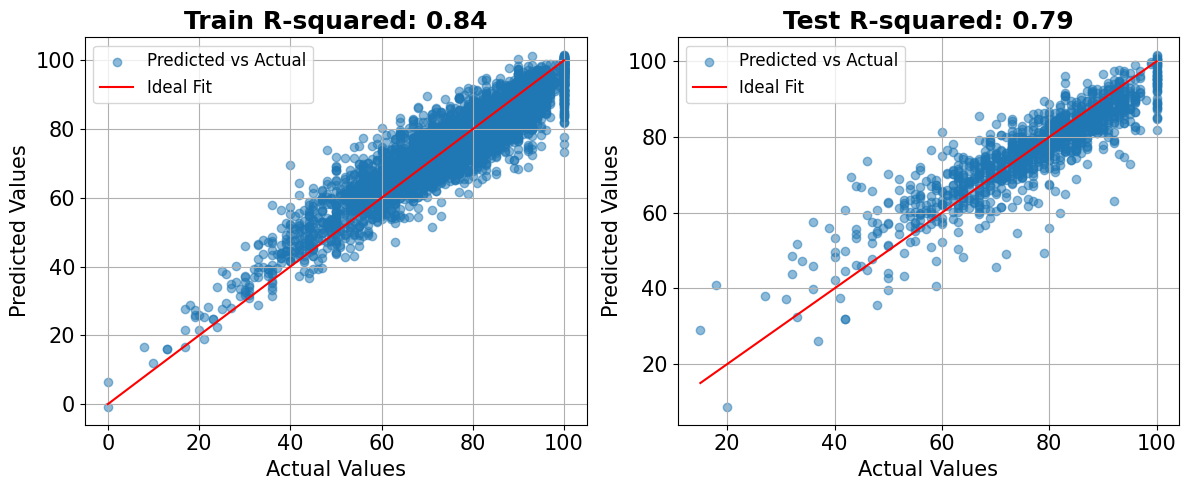

In [58]:
# Create a figure with a grid of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot 1: Actual vs Predicted for Training Data
axes[0].scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
axes[0].set_xlabel('Actual Values', fontsize=15)
axes[0].set_ylabel('Predicted Values', fontsize=15)
# axes[0].set_yticks(fontsize=15)
# axes[0].set_xticks(fontsize=15)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_title('Train R-squared: {}'.format(round(r2_train, 2)), fontsize=18, weight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(True)

# Plot 2: Actual vs Predicted for Test Data
axes[1].scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
axes[1].set_xlabel('Actual Values', fontsize=15)
axes[1].set_ylabel('Predicted Values', fontsize=15)
# axes[1].set_yticks(fontsize=15)
# axes[1].set_xticks(fontsize=15)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].set_title('Test R-squared: {}'.format(round(r2, 2)), fontsize=18, weight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

dict_keys(['loss', 'val_loss'])


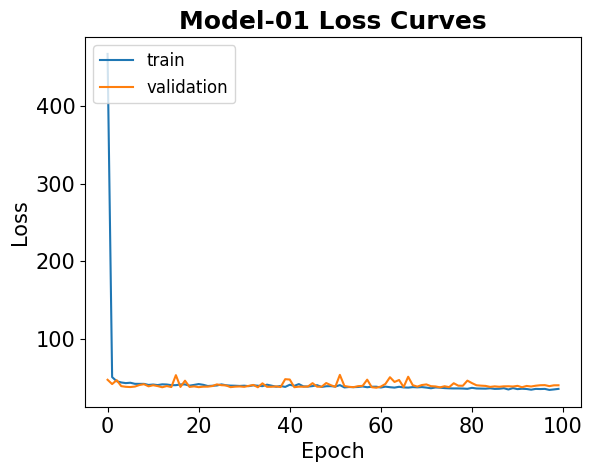

In [59]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model-01 Loss Curves', fontsize=18, weight='bold')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()